In [1]:
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.Utility import *
from TO_sim.To_Draw import *
import numpy as np
import matplotlib.pyplot as plt
import parmap

# Kc case1에서의 이론적인 K값에서의 행동을 확인,  
IS state에서 시작함

In [2]:
def check_case1_KR(m):
    Ks = np.linspace(0.1,15,500)
    KF,RF,KB,RB = Make_theorical_KR(Ks,m)
    min_KF = min(KF)
    min_RF = min(RF)
    return min_KF,min_RF
func = np.vectorize(check_case1_KR)

In [47]:
ms = np.linspace(0.5,6,201)

In [48]:
S = func(ms)

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theorical.py:23: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


Text(0, 0.5, 'r (order parameter)')

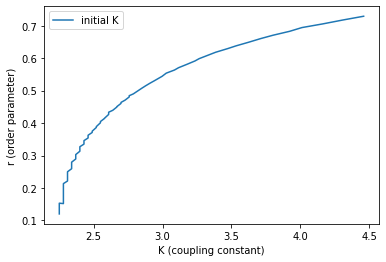

In [49]:
plt.plot(*S,label = 'initial K')
plt.legend()
plt.xlabel('K (coupling constant)')
plt.ylabel('r (order parameter)')

In [42]:
N = 500
theta_init, omega_init, Kc = Quantile_Lorentzian(N, 0, 1, seed=12)
dtheta_init = np.zeros(N)
t_end = 3200
dt = 0.1
@timing
def Check_rk4_dt(K,m):
    theta_s, dtheta_s, omega, rs, t = Sol_Kuramoto_mf(N,K,m,(0, t_end),dt=dt,
                p_theta=theta_init,
                p_dtheta=dtheta_init,
                p_omega=omega_init,
                distribution="Normal",)
    return t, rs
func2 = np.vectorize(Check_rk4_dt)

In [44]:
AS=AS[:10]+ [Check_rk4_dt(K,m) for K,m in zip(S[0][10:15],ms[10:15])]

func:'Check_rk4_dt' args:[(2.936673346693387, 1.0555555555555556), {}] took: 16.0484 sec
func:'Check_rk4_dt' args:[(2.8769539078156314, 1.1111111111111112), {}] took: 16.0271 sec
func:'Check_rk4_dt' args:[(2.817234468937876, 1.1666666666666665), {}] took: 15.9869 sec
func:'Check_rk4_dt' args:[(2.7575150300601203, 1.2222222222222223), {}] took: 16.1309 sec
func:'Check_rk4_dt' args:[(2.727655310621243, 1.2777777777777777), {}] took: 16.1631 sec


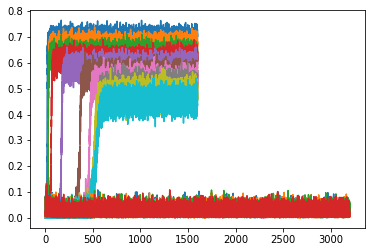

In [46]:
for i,m in enumerate(ms[:14]):
    plt.plot(*AS[i],label=f'm={m}')

In [33]:
S[0][:10]

array([4.45951904, 4.16092184, 3.89218437, 3.71302605, 3.53386774,
       3.38456914, 3.26513026, 3.1755511 , 3.08597194, 2.99639279])